Keilee CLayton
HW 9

-9.960780894732304 6.285027522876634 -592.9862102927397 9.265672019055145


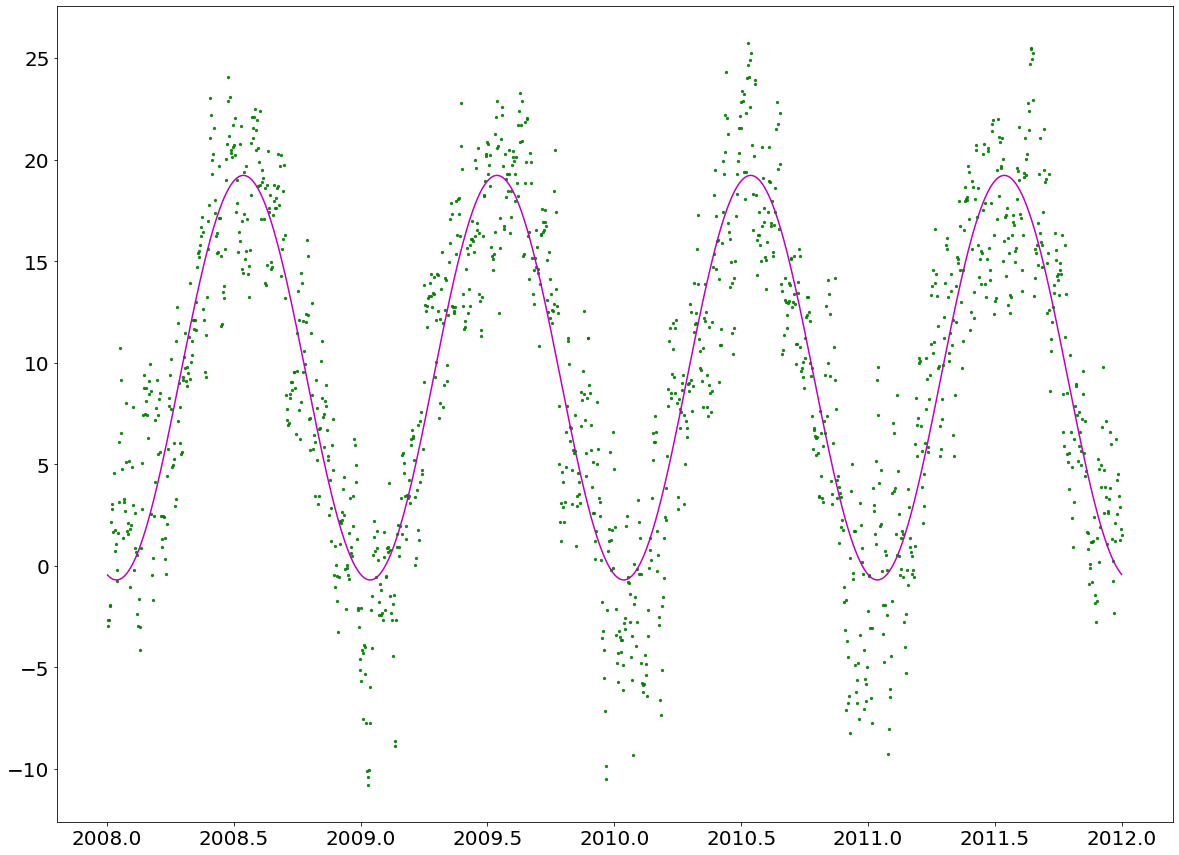

19.22643654047446
-0.6950780840174957
9.26125207785909


In [2]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN DATA FILE/
data = np.genfromtxt("munich_temperatures.txt")
Date = data[:,0]
Temp = data[:,1] 

#mask data
gd1 = (Temp < 30) & (Temp > -25)&\
    (Date <= 2012) & (Date >= 2008)
good1 = np.where(gd1)[0]

# PLOT TO VERIFY FILE READ I
fig1 = plt.figure(figsize=(20,15))
ax1 = fig1.add_subplot(111)
ax1.scatter(Date[gd1],Temp[gd1],s=5,c='g',alpha=0.9)

ax1.xaxis.set_tick_params(labelsize=20)
ax1.yaxis.set_tick_params(labelsize=20)


def sinfit (x,a,b,c,d):
    return a*np.sin(b*x +c) + d

x = Date[gd1]
y = Temp[gd1]

popt, pcov = opt.curve_fit(sinfit, x, y, p0 = [-9.96,6.28 ,-583.5, 9.26])

print(*popt)

plt.plot(x, sinfit(x, *popt), c = 'm')
plt.show()
print(max(sinfit(x, *popt))) #max temp 
print(min(sinfit(x, *popt))) #min temp
print(sum(sinfit(x, *popt))/len(x)) #overall average temp 

d). The values produced for the average temperature makes sense that it is the same as the amplitude of sinfit. The maximum estimated by looking at the graph would be roughly 20 so the output of 19.226 is valid. The minimum value I would estimate from the curvefit would be around 0 so the -0.695 calculated minimum also makes sense. 

In [2]:
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import fits 
import scipy.optimize as opt

# POTENTIAL FITTING FUNCTIONS
def linear(x,m,b):
    return m*x+b

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c

def poly3(x,a,b,c,d):
    return (a*(x**3))+(b*(x**2))+(c*x)+d

def exponential(x,a,b,c,d):
    return a*np.exp(b*x + c) + d

def cosfit (x,a,b,c,d):
    return a*np.cos(b*x + c) + d

def logfit(x,a,b,c,d):
    return a*np.log(b*x + c) + d

def gausian(x,mu,sigma):
    part1 = (1.0/np.sqrt(2*np.pi*sigma**2))
    return (part1*(np.exp((-1*x - mu)**2/(2*sigma**2))))

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))

def sigmoid(x,a,b,c,d):
    return (c/(1 + np.exp(-b*(x-a))) + d)

# READ IN FITS FILES
star_hdus = fits.open('allStar-l31c.2.fits')
star = star_hdus[1].data
print(star_hdus[1].columns)
star_hdus.close()

# TWO BITWISE FLAGS FOR BAD DATA             
badbits = 2**23        # aspcapstar flag - Chemistry
suspectbits = 2**16    # star flag - Stellar parameters

# Make a Boolena Mask to remove bad data
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0)
good = np.where(gd)[0]


# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['ra'][good],star['DEC'][good],s=1,c='b',alpha=0.1)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
plt.show()

ColDefs(
    name = 'APSTAR_ID'; format = '45A'
    name = 'TARGET_ID'; format = '34A'
    name = 'ASPCAP_ID'; format = '46A'
    name = 'FILE'; format = '38A'
    name = 'APOGEE_ID'; format = '18A'
    name = 'TELESCOPE'; format = '8A'
    name = 'LOCATION_ID'; format = 'I'
    name = 'FIELD'; format = '16A'
    name = 'J'; format = 'E'
    name = 'J_ERR'; format = 'E'
    name = 'H'; format = 'E'
    name = 'H_ERR'; format = 'E'
    name = 'K'; format = 'E'
    name = 'K_ERR'; format = 'E'
    name = 'RA'; format = 'D'
    name = 'DEC'; format = 'D'
    name = 'GLON'; format = 'D'
    name = 'GLAT'; format = 'D'
    name = 'APOGEE_TARGET1'; format = 'J'
    name = 'APOGEE_TARGET2'; format = 'J'
    name = 'APOGEE_TARGET3'; format = 'J'
    name = 'TARGFLAGS'; format = '140A'
    name = 'SURVEY'; format = '14A'
    name = 'NINST'; format = '3J'
    name = 'NVISITS'; format = 'J'
    name = 'COMBTYPE'; format = 'J'
    name = 'COMMISS'; format = 'I'
    name = 'SNR'; format = 'E'
    n

<Figure size 2000x1500 with 1 Axes>

0.0014945181381815454 -4.7387706113986106
5014.5920973544935 913.8662036775498 2.7115340816261115


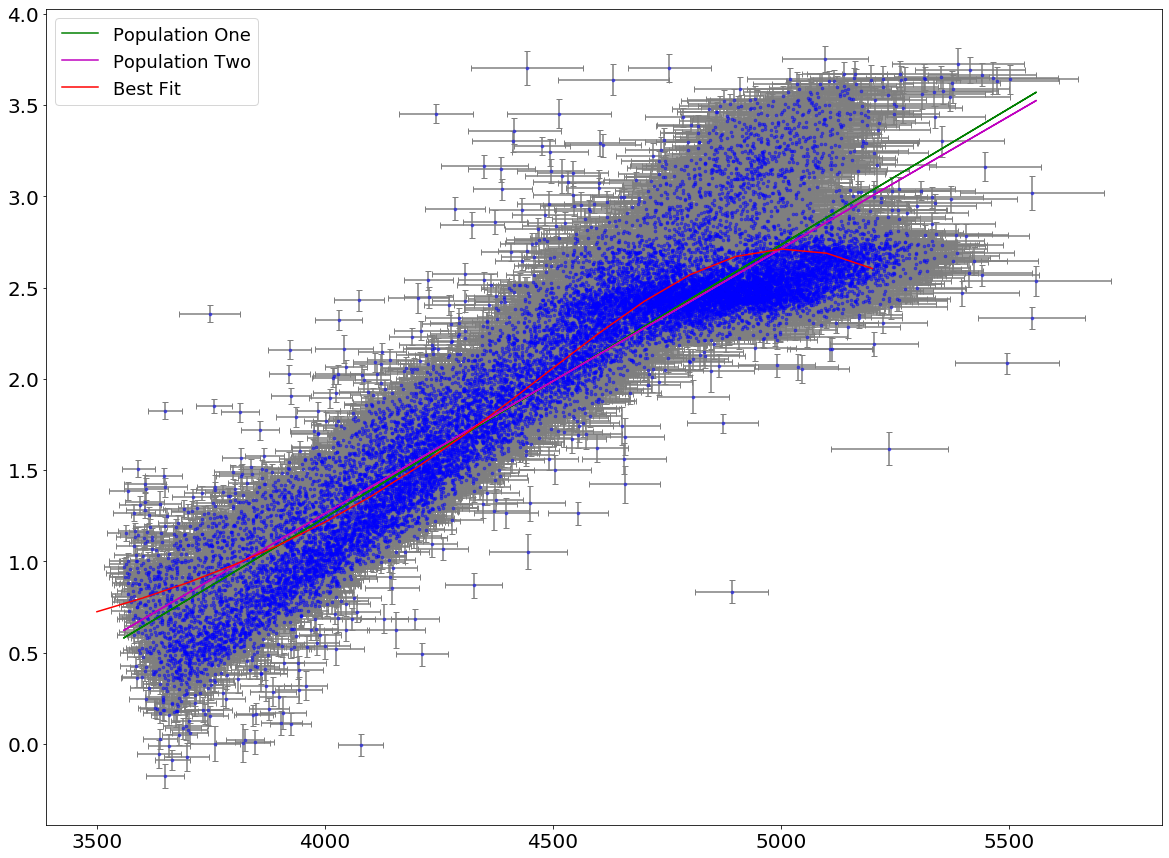

In [32]:
#part A
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT']> -1) & (star['GLAT'] <1) &\
    (star['LOGG'] > -9999) & (star['LOGG'] < 9999) &\
    (star['TEFF'] > -9999) & (star['TEFF'] < 9999)&\
    (star['TEFF_ERR'] > -9999) & (star['TEFF_ERR'] < 9999) &\
    (star['LOGG_ERR'] > -9999) & (star['LOGG_ERR'] < 9999)
good = np.where(gd)[0]

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][good],star['LOGG'][good],s=7,c='b',alpha=0.45)
ax.errorbar(star['TEFF'][good],star['LOGG'][good],yerr=star['LOGG_ERR'][good], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.errorbar(star['TEFF'][good],star['LOGG'][good],xerr=star['TEFF_ERR'][good], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

#fitting
def linear(x,m,b):
    return m*x+b
x = star['TEFF'][good]
y = star['LOGG'][good]

popt, pcov = opt.curve_fit(linear, x, y, p0 = [0.0015, -4.7])
print(*popt)
ax.plot(x, linear(x, *popt), c = 'g', label='Population One')
#error bars and values
x = star['TEFF'][good]
y = star['LOGG'][good]
x_err = star['TEFF_ERR'][good]
y_err = star['LOGG_ERR'][good]

def mcFit(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weights = np.random.randn(len(y))
        weights2 = np.random.randn(len(x))

        y_adj = y + y_err*weights
        x_adj = x + x_err*weights2
        
        params, cov = opt.curve_fit(linear, x_adj, y_adj)

        slopes.append(params[0])
        y_ints.append(params[1])

    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]

popta, pcov = mcFit(x,y,x_err, y_err)
ax.plot(x, linear(x, *popta), c = 'm',label='Population Two') #plot the function not the fit

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))
def mcFit3param(function, xx, yy, xx_err, yy_err, guess):

    a3mean = list()
    b3mean = list()
    c3mean = list()
    iters = 1000 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight2x = np.random.randn(len(xx))
        weight2y = np.random.randn(len(yy))

        xx_adj = xx + xx_err*weight2x 
        yy_adj = yy + yy_err*weight2y
        
        params2, cov2 = opt.curve_fit(function, xx_adj, yy_adj, p0=guess)
        a3mean.append(params2[0])
        b3mean.append(params2[1])
        c3mean.append(params2[2])

    return [np.mean(a3mean), np.mean(b3mean), np.mean(c3mean)],[np.std(a3mean), np.std(b3mean), np.std(c3mean)]

popp, pcov = mcFit3param(lorentzian_cauchy,star['TEFF'][good],star['LOGG'][good],star['TEFF_ERR'][good],star['LOGG_ERR'][good],[5015,8,2.5])
print(*popp)

xdata=np.arange(3500,5300,100)
ax.plot(xdata, lorentzian_cauchy(xdata, *popp), c = 'r', label = 'Best Fit')
plt.legend(loc='best', fontsize=18)

Part A:
    The best fit line is found using the lorenztian cauchy function with three parameters. The other populations could be found using linear lines. 

-0.20194465443520826 0.04941714680634263
-0.2017816995035226 0.04944203397453073
-0.05608944925355205 -0.265234808229799 0.0480787566443626


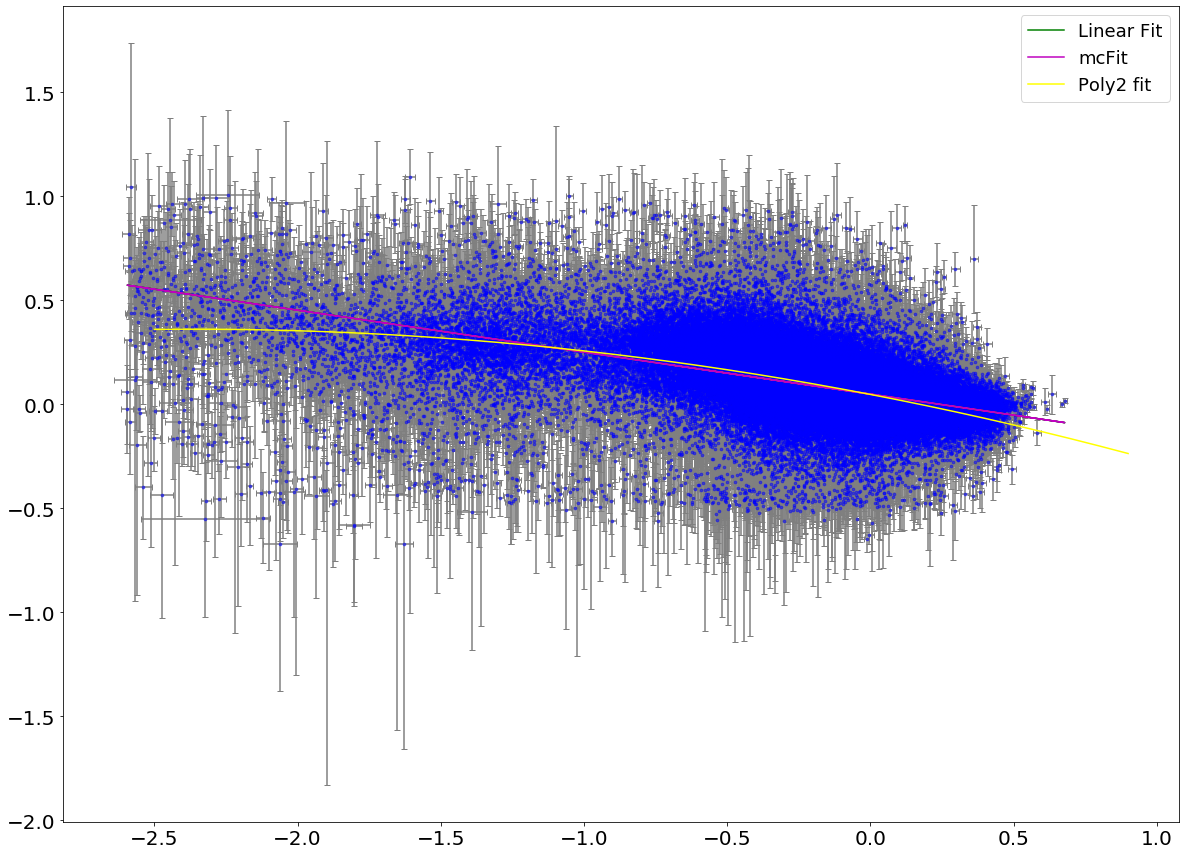

In [33]:
#part B 
gb = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    ((star['GLAT']> 10) | (star['GLAT'] <-10)) &\
    (star['FE_H'] > -9999) & (star['FE_H'] < 9999) &\
    (star['O_FE'] > -9999) & (star['O_FE'] < 9999)&\
    (star['FE_H_ERR'] > -9999) & (star['FE_H_ERR'] < 9999) &\
    (star['O_FE_ERR'] > -9999) & (star['O_FE_ERR'] < 9999)
goodb = np.where(gb)[0]

# PLOT TO VERIFY FITS FILE READ IN & BAD MASK DATA
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][goodb],star['O_FE'][goodb],s=7,c='b',alpha=0.5)
ax.errorbar(star['FE_H'][goodb],star['O_FE'][goodb],yerr=star['O_FE_ERR'][goodb], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.errorbar(star['FE_H'][goodb],star['O_FE'][goodb],xerr=star['FE_H_ERR'][goodb], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
#fitting
def linear(x,m,b):
    return m*x+b

x = star['FE_H'][goodb]
y = star['O_FE'][goodb]

popt, pcov = opt.curve_fit(linear, x, y, p0 = [-0.2, 0.05])
print(*popt)
ax.plot(x, linear(x, *popt), c = 'g', label='Linear Fit')

#error bars and values
x = star['FE_H'][goodb]
y = star['O_FE'][goodb]
x_err = star['FE_H_ERR'][goodb]
y_err = star['O_FE_ERR'][goodb]

def mcFit(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weights = np.random.randn(len(y))
        weights2 = np.random.randn(len(x))

        y_adj = y + y_err*weights
        x_adj = x + x_err*weights2
        
        params, cov = opt.curve_fit(linear, x_adj, y_adj)

        slopes.append(params[0])
        y_ints.append(params[1])

    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]
       
poptb, pcov = mcFit(x,y,x_err, y_err)
ax.plot(x, linear(x, *poptb), c = 'm', label='mcFit') #plot the function not the fit
print(*poptb)

def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c
def mcFit3param(function, xx, yy, xx_err, yy_err, guess):

    a3mean = list()
    b3mean = list()
    c3mean = list()
    iters = 1000 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight2x = np.random.randn(len(xx))
        weight2y = np.random.randn(len(yy))

        xx_adj = xx + xx_err*weight2x 
        yy_adj = yy + yy_err*weight2y
        
        params2, cov2 = opt.curve_fit(function, xx_adj, yy_adj, p0=guess)
        a3mean.append(params2[0])
        b3mean.append(params2[1])
        c3mean.append(params2[2])

    return [np.mean(a3mean), np.mean(b3mean), np.mean(c3mean)],[np.std(a3mean), np.std(b3mean), np.std(c3mean)]

popp, pcov = mcFit3param(poly2,star['FE_H'][goodb], star['O_FE'][goodb],star['FE_H_ERR'][goodb],star['O_FE_ERR'][goodb],[0.068,0.0108,0.016])
print(*popp)
xdata = np.arange(-2.5,1,0.1)
ax.plot(xdata, poly2(xdata, *popp), c = 'yellow', label = 'Poly2 fit')
plt.legend(loc='best', fontsize=18)

Part B:
    The best fit appears to be from the linear function but another population could be represented by the poly2 function. 

-0.13159174880648714 0.047178381959294406
-0.13141453961995114 0.04719227924584545
0.09121473378130818 -0.10721877081398729 0.041576601159674736


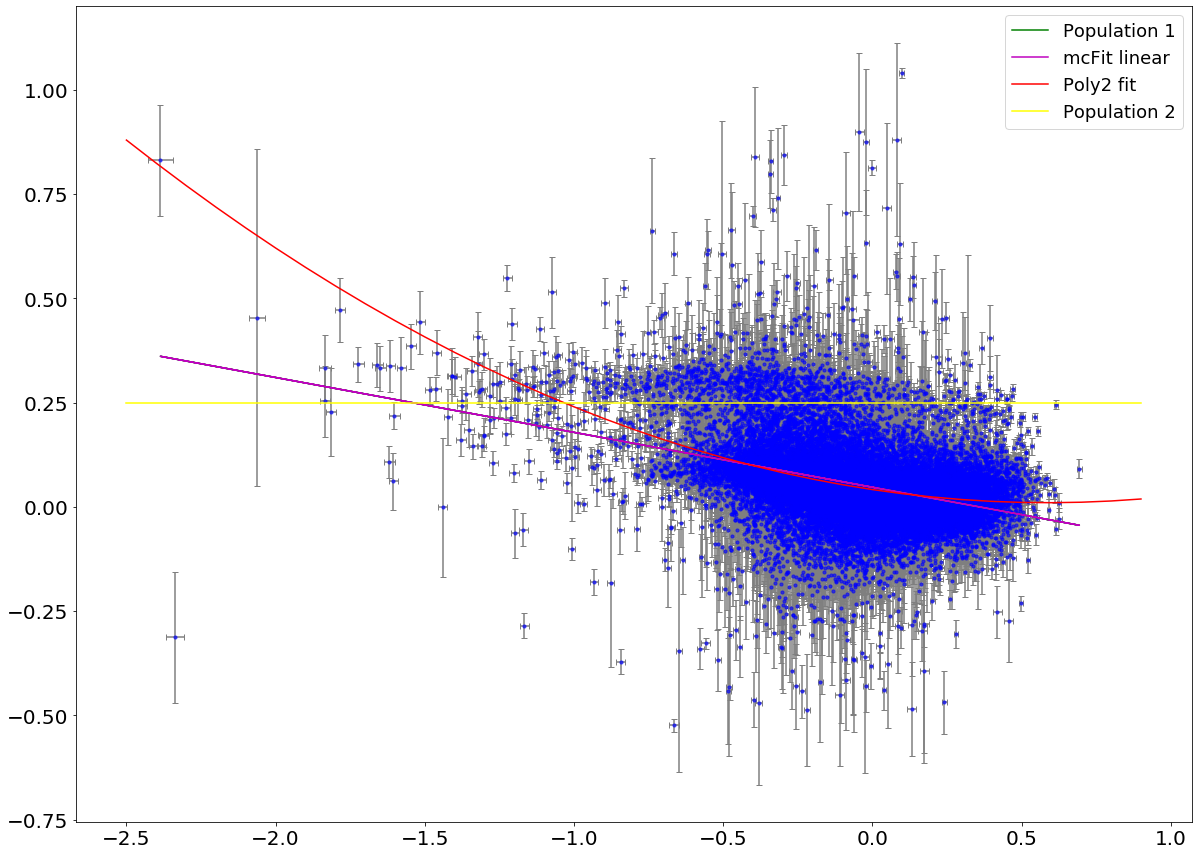

In [34]:
#part C
gc = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT']> -2) & (star['GLAT'] <2) &\
    (star['FE_H'] > -9999) & (star['FE_H'] < 9999) &\
    (star['O_FE'] > -9999) & (star['O_FE'] < 9999) &\
    (star['FE_H_ERR'] > -9999) & (star['FE_H_ERR'] < 9999) &\
    (star['O_FE_ERR'] > -9999) & (star['O_FE_ERR'] < 9999)
goodc = np.where(gc)[0]

#fitting
def linear(x,m,b):
    return m*x+b

x = star['FE_H'][goodc]
y = star['O_FE'][goodc]

popt, pcov = opt.curve_fit(linear, x, y, p0 = [-0.2, 0.05])
print(*popt)
#error bars and values
x = star['FE_H'][goodc]
y = star['O_FE'][goodc]
x_err = star['FE_H_ERR'][goodc]
y_err = star['O_FE_ERR'][goodc]

def mcFit(x, y, x_err, y_err):
    slopes = list()
    y_ints = list()
    iters = 500 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weights = np.random.randn(len(y))
        weights2 = np.random.randn(len(x))

        y_adj = y + y_err*weights
        x_adj = x + x_err*weights2
        
        params, cov = opt.curve_fit(linear, x_adj, y_adj)

        slopes.append(params[0])
        y_ints.append(params[1])

    return [np.mean(slopes), np.mean(y_ints)], [np.std(slopes), np.std(y_ints)]
      
poptc, pcov = mcFit(x,y,x_err, y_err)
print(*poptc)
def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c
def mcFit3param(function, xx, yy, xx_err, yy_err, guess):

    a3mean = list()
    b3mean = list()
    c3mean = list()
    iters = 1000 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight2x = np.random.randn(len(xx))
        weight2y = np.random.randn(len(yy))

        xx_adj = xx + xx_err*weight2x 
        yy_adj = yy + yy_err*weight2y
        
        params2, cov2 = opt.curve_fit(function, xx_adj, yy_adj, p0=guess)
        a3mean.append(params2[0])
        b3mean.append(params2[1])
        c3mean.append(params2[2])

    return [np.mean(a3mean), np.mean(b3mean), np.mean(c3mean)],[np.std(a3mean), np.std(b3mean), np.std(c3mean)]

popp, pcov = mcFit3param(poly2,star['FE_H'][goodc], star['O_FE'][goodc],star['FE_H_ERR'][goodc],star['O_FE_ERR'][goodc],[0.068,0.0108,0.016])
print(*popp)

# PLOT 
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][goodc],star['O_FE'][goodc],s=10,c='b',alpha=0.6)
ax.errorbar(star['FE_H'][goodc],star['O_FE'][goodc],yerr=star['O_FE_ERR'][goodc], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.errorbar(star['FE_H'][goodc],star['O_FE'][goodc],xerr=star['FE_H_ERR'][goodc], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.plot(x, linear(x, *popt), c = 'g', label = 'Population 1')
ax.plot(x, linear(x, *popt), c = 'm', label = 'mcFit linear')
xdata = np.arange(-2.5,1,0.1)
ax.plot(xdata, poly2(xdata, *popp), c = 'r', label = 'Poly2 fit')
ax.plot(xdata, 0*poly2(xdata, *popp)+0.25, c = 'yellow', label = 'Population 2')
plt.legend(loc='best', fontsize=18)
plt.show()

Part C:
    The best fit appears to be from the poly2 function with three parameters. Other populations could be mapped out by two different linear lines. 

-0.0002918369024670748 2.075414918615217
3675.8524655201973 1642.47199402645 0.9773159739762354


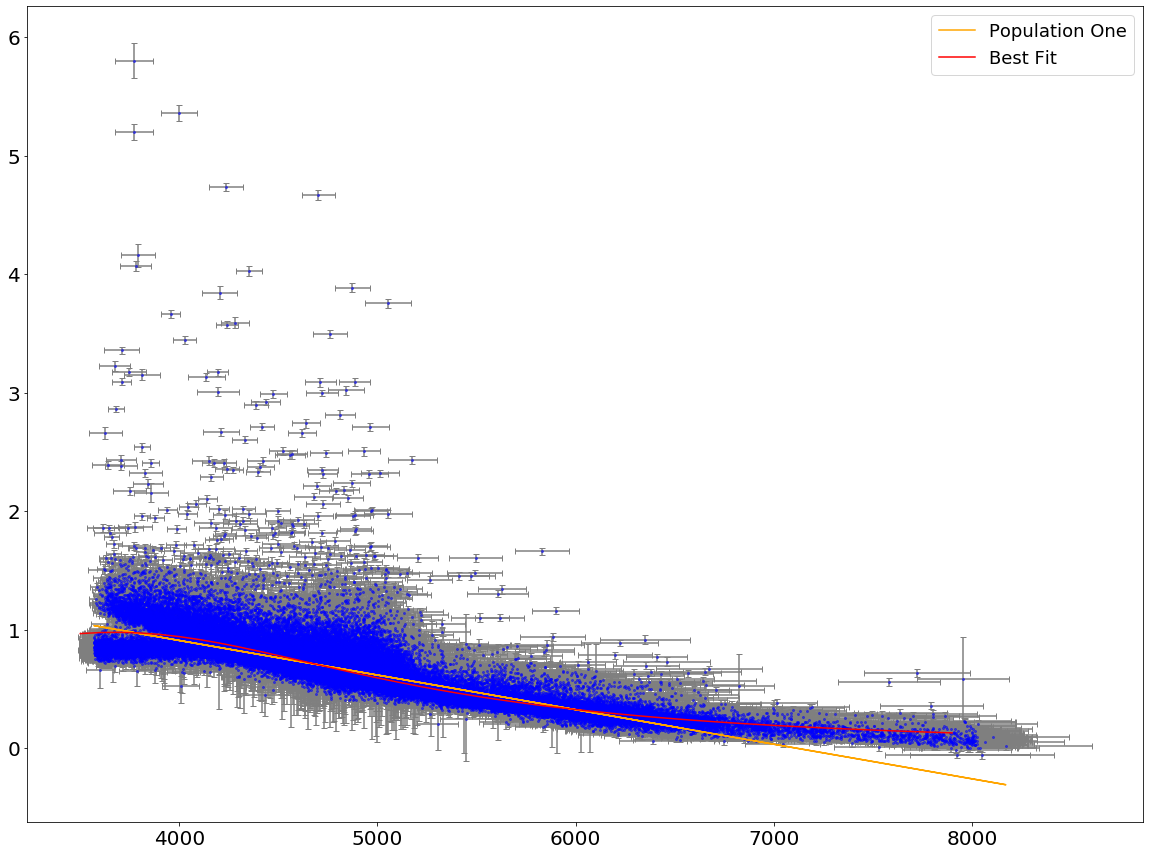

In [3]:
#part D
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    ((star['GLAT']> 10) | (star['GLAT'] <-10)) &\
    (star['TEFF'] > -9990) & (star['TEFF'] < 9999) &\
    (star['J'] > -9990) & (star['J'] < 9999) &\
    (star['K'] > -9990) & (star['K'] < 9999) &\
    (star['K_ERR'] > -9990) & (star['K_ERR'] < 5) &\
    (star['J_ERR'] > -9900) & (star['J_ERR'] < 5)
good = np.where(gd)[0]

#fitting
def linear(x,m,b):
    return m*x+b

x = star['TEFF'][good]
y = star['J'][good]-star['K'][good]

popt, pcov = opt.curve_fit(linear, x, y, p0 = [-0.2, 1])
print(*popt)

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))
def mcFit3param(function, xx, yy, xx_err, yy_err, guess):

    a3mean = list()
    b3mean = list()
    c3mean = list()
    iters = 1000 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight2x = np.random.randn(len(xx))
        weight2y = np.random.randn(len(yy))

        xx_adj = xx + xx_err*weight2x 
        yy_adj = yy + yy_err*weight2y
        
        params2, cov2 = opt.curve_fit(function, xx_adj, yy_adj, p0=guess)
        a3mean.append(params2[0])
        b3mean.append(params2[1])
        c3mean.append(params2[2])

    return [np.mean(a3mean), np.mean(b3mean), np.mean(c3mean)],[np.std(a3mean), np.std(b3mean), np.std(c3mean)]

popp, pcov = mcFit3param(lorentzian_cauchy,star['TEFF'][good],star['J'][good]-star['K'][good],star['TEFF_ERR'][good],np.sqrt((star['J_ERR'][good])**2 + (star['K_ERR'][good])**2),[4000,8,0.8])
print(*popp)
xdata=np.arange(3500,8000,100)

#plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['TEFF'][good],(star['J'][good]-star['K'][good]),s=4,c='b',alpha=0.5)
ax.errorbar(star['TEFF'][good],(star['J'][good]-star['K'][good]),xerr=star['TEFF_ERR'][good], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.errorbar(star['TEFF'][good],(star['J'][good]-star['K'][good]),yerr=(np.sqrt((star['J_ERR'][good])**2 + (star['K_ERR'][good])**2)), c='tab:gray', fmt='.', markersize=1, capsize=3 ,zorder=0)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.plot(x, linear(x, *popt), c = 'orange', label='Population One')
ax.plot(xdata, lorentzian_cauchy(xdata, *popp), c = 'r', label = 'Best Fit')
plt.legend(loc='best', fontsize=18)

# Part D:
    The best fit line was found using the Lorentzian Cauchy function. Another population could be modeled by a linear function.

49.90570346758136 0.03222185681934646 -0.5601396943037187 -15.43521530281971


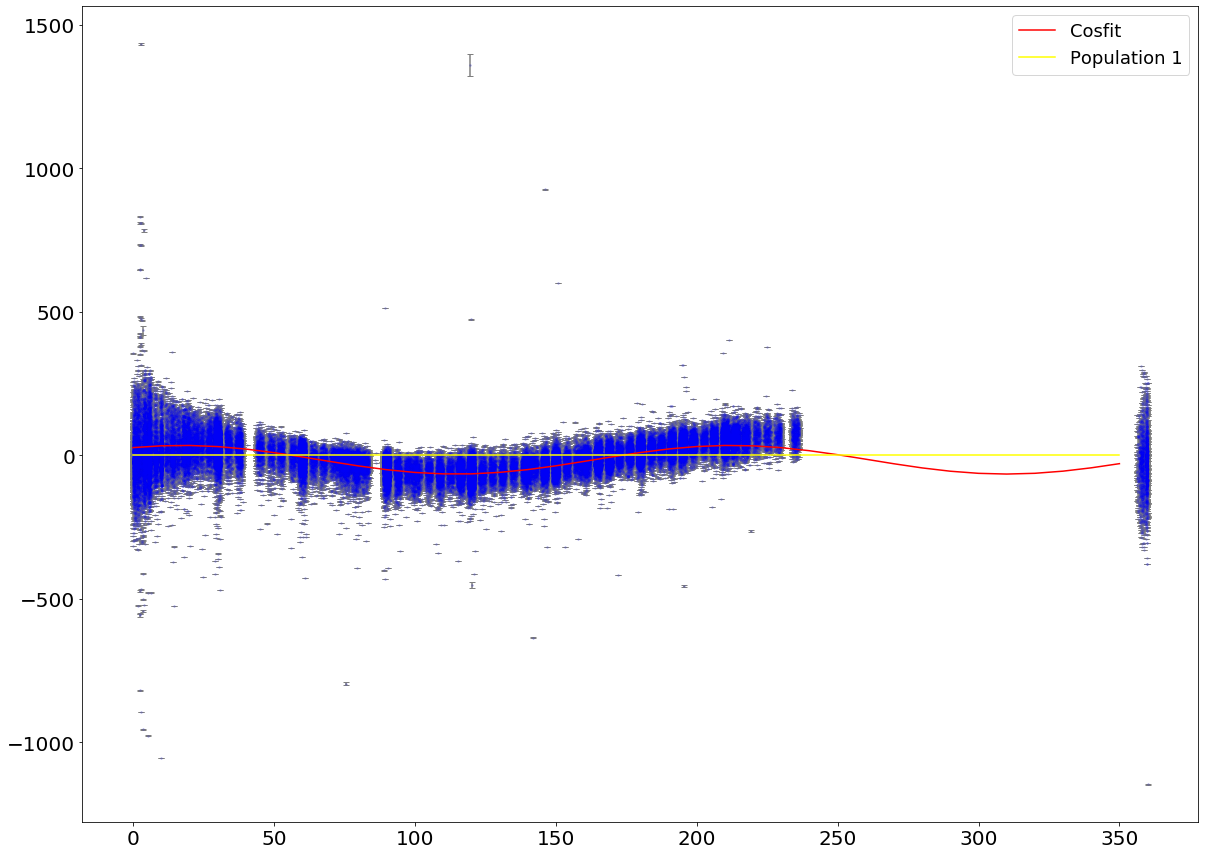

In [41]:
#part E
gd = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT']> -10) & (star['GLAT'] <10) &\
    (star['GLON'] > -9990) & (star['GLON'] < 9999) &\
    (star['VHELIO_AVG'] > -9900) & (star['VHELIO_AVG'] < 9999) &\
    (star['VERR'] > -9990) & (star['VERR'] < 9999)
good = np.where(gd)[0]
#plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['GLON'][good],star['VHELIO_AVG'][good],s=4,c='b',alpha=0.1)
ax.errorbar(star['GLON'][good],star['VHELIO_AVG'][good],yerr=star['VERR'][good], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)

#fitting
def cosfit (x,a,b,c,d):
    return a*np.cos(b*x +c) + d
def mcFit4param(cosfit, x3, y3, x3_err, y3_err, guess):

    a4mean = list()
    b4mean = list()
    c4mean = list()
    d4mean = list()
    iters = 10 

    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight3x = np.random.randn(len(x3))
        weight3y = np.random.randn(len(y3))

        x3_adj = x3 + x3_err*weight3x 
        y3_adj = y3 + y3_err*weight3y

        params3, cov3 = opt.curve_fit(cosfit, x3_adj, y3_adj, p0=guess)

        a4mean.append(params3[0])
        b4mean.append(params3[1])
        c4mean.append(params3[2])
        d4mean.append(params3[3])
    return [np.mean(a4mean), np.mean(b4mean), np.mean(c4mean), np.mean(d4mean)],[np.std(a4mean), np.std(b4mean), np.std(c4mean), np.std(d4mean)]

popt,pcov = mcFit4param(cosfit, star['GLON'][good], star['VHELIO_AVG'][good],0.0,star['VERR'][good],[50,0.03,-.5,-15])
print(*popt)
xdata= np.arange(0,360,10)
ax.plot(xdata,cosfit(xdata,*popt), c='r', label='Cosfit')
ax.plot(xdata,0.0*cosfit(xdata,*popt), c='yellow', label = 'Population 1') #linear line on the 0 axis
plt.legend(loc='best', fontsize=18)


Part E:
    The line of best fit is found using the cosine function. An additional population can be found with a linear line. 

-0.22497774736404252 0.6827318885138758 -0.6079080380956889 0.34793411639584404
13.585937281620126 6.248318673631579 1.1453080681727978
-0.0021251784079250984 0.10435453585521089 0.0017985356601486033


C:\Users\keile\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in log
  if sys.path[0] == '':


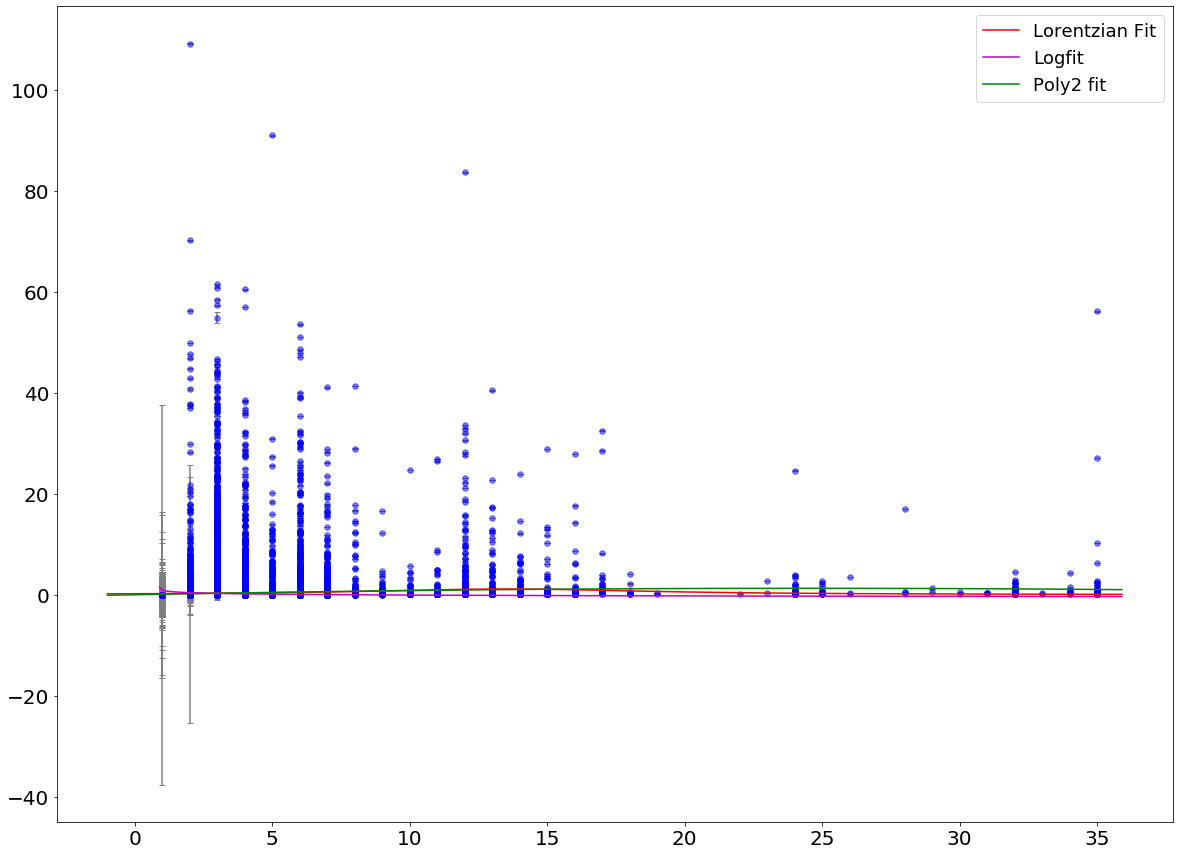

In [4]:
#part F
gf = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT']> -10) & (star['GLAT'] <10) &\
    (star['NVISITS'] > -9990) & (star['NVISITS'] < 9990) &\
    (star['VSCATTER'] > -9990) & (star['VSCATTER'] < 400)&\
    (star['VERR'] > -9990) & (star['VERR'] < 9990)
goodf = np.where(gf)[0]

#fitting
def logfit(x,a,b,c,d):
    return a*np.log(b*x +c) + d
def mcFit4param(function, x3, y3, x3_err, y3_err, guess):

    a4mean = list()
    b4mean = list()
    c4mean = list()
    d4mean = list()
    iters = 100 

    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight3x = np.random.randn(len(x3))
        weight3y = np.random.randn(len(y3))

        x3_adj = x3 + x3_err*weight3x 
        y3_adj = y3 + y3_err*weight3y

        params3, cov3 = opt.curve_fit(function, x3_adj, y3_adj, p0=guess)

        a4mean.append(params3[0])
        b4mean.append(params3[1])
        c4mean.append(params3[2])
        d4mean.append(params3[3])
    return [np.mean(a4mean), np.mean(b4mean), np.mean(c4mean), np.mean(d4mean)],[np.std(a4mean), np.std(b4mean), np.std(c4mean), np.std(d4mean)]

poptf,pcov = mcFit4param(cosfit, star['NVISITS'][goodf], star['VSCATTER'][goodf],0*star['VERR'][goodf],star['VERR'][goodf],[-25,1.0,-2.0,55])
print(*poptf)

def lorentzian_cauchy (x,a,b,c):
    return (c)*(b**2/((x-a)**2 + b**2))
def mcFit3param(function, xx, yy, xx_err, yy_err, guess):

    a3mean = list()
    b3mean = list()
    c3mean = list()
    iters = 1000 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight2x = np.random.randn(len(xx))
        weight2y = np.random.randn(len(yy))

        xx_adj = xx + xx_err*weight2x 
        yy_adj = yy + yy_err*weight2y
        
        params2, cov2 = opt.curve_fit(function, xx_adj, yy_adj, p0=guess)
        a3mean.append(params2[0])
        b3mean.append(params2[1])
        c3mean.append(params2[2])

    return [np.mean(a3mean), np.mean(b3mean), np.mean(c3mean)],[np.std(a3mean), np.std(b3mean), np.std(c3mean)]

popp, pcov = mcFit3param(lorentzian_cauchy,star['NVISITS'][goodf], star['VSCATTER'][goodf],0,star['VERR'][goodf],[5,1,60])
print(*popp)
def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c
def mcFit3param(function, xx, yy, xx_err, yy_err, guess):

    a3mean = list()
    b3mean = list()
    c3mean = list()
    iters = 1000 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight2x = np.random.randn(len(xx))
        weight2y = np.random.randn(len(yy))

        xx_adj = xx + xx_err*weight2x 
        yy_adj = yy + yy_err*weight2y
        
        params2, cov2 = opt.curve_fit(function, xx_adj, yy_adj, p0=guess)
        a3mean.append(params2[0])
        b3mean.append(params2[1])
        c3mean.append(params2[2])

    return [np.mean(a3mean), np.mean(b3mean), np.mean(c3mean)],[np.std(a3mean), np.std(b3mean), np.std(c3mean)]

poptt, pcov = mcFit3param(poly2,star['NVISITS'][goodf], star['VSCATTER'][goodf],0,star['VERR'][goodf],[-1,10,30])
print(*poptt)

#plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['NVISITS'][goodf],star['VSCATTER'][goodf],s=30,c='b',alpha=0.5)
ax.errorbar(star['NVISITS'][goodf],star['VSCATTER'][goodf],yerr=star['VERR'][goodf], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)

ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
xdata = np.arange(-1,36,0.1)
ax.plot(xdata, lorentzian_cauchy(xdata, *popp), c = 'r', label = 'Lorentzian Fit')
ax.plot(xdata,logfit(xdata,*poptf), c='m', label = 'Logfit')
ax.plot(xdata, poly2(xdata, *poptt), c = 'g', label = 'Poly2 fit')
plt.legend(loc='best', fontsize=18)
plt.show()

Part F:
    The best fit should have been the log fit. Other population models could have been covered by Lorentzian and poly2 function fit.

0.06803819371353681 0.010709594437636596 0.016767372443879897


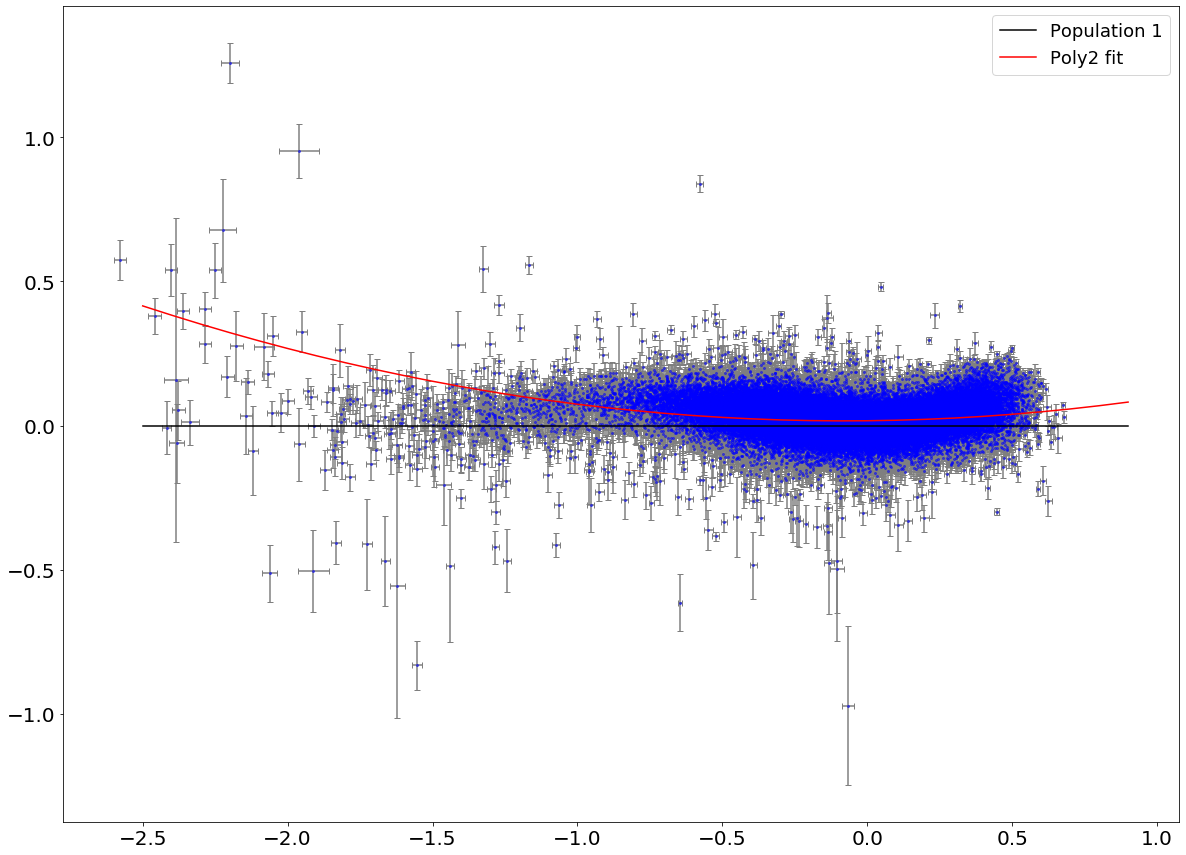

In [5]:
#part G
gg = (np.bitwise_and(star['aspcapflag'], badbits) == 0) &\
     (np.bitwise_and(star['starflag'], suspectbits) == 0) &\
    (star['GLAT']> -10) & (star['GLAT'] <10) &\
    (star['FE_H'] > -9990) & (star['FE_H'] < 9990) &\
    (star['NI_FE'] > -9990) & (star['NI_FE'] < 9990)&\
    (star['FE_H_ERR'] > -9990) & (star['FE_H_ERR'] < 9990) &\
    (star['NI_FE_ERR'] > -9990) & (star['NI_FE_ERR'] < 9990)
goodg = np.where(gg)[0]

#fitting
def poly2(x,a,b,c):
    return a*(x**2)+(b*x)+c
def mcFit3param(function, xx, yy, xx_err, yy_err, guess):

    a3mean = list()
    b3mean = list()
    c3mean = list()
    iters = 1000 
    for i in range(iters):
        # remember random normal distribution (Gaussian)
        weight2x = np.random.randn(len(xx))
        weight2y = np.random.randn(len(yy))

        xx_adj = xx + xx_err*weight2x 
        yy_adj = yy + yy_err*weight2y
        
        params2, cov2 = opt.curve_fit(function, xx_adj, yy_adj, p0=guess)
        a3mean.append(params2[0])
        b3mean.append(params2[1])
        c3mean.append(params2[2])

    return [np.mean(a3mean), np.mean(b3mean), np.mean(c3mean)],[np.std(a3mean), np.std(b3mean), np.std(c3mean)]

popp, pcov = mcFit3param(poly2,star['FE_H'][goodg], star['NI_FE'][goodg],star['FE_H_ERR'][goodg],star['NI_FE_ERR'][goodg],[0.068,0.0108,0.016])
print(*popp)
#plot
fig = plt.figure(figsize=(20,15))
ax = fig.add_subplot(111)
ax.scatter(star['FE_H'][goodg],star['NI_FE'][goodg],s=4,c='b',alpha=0.5)
ax.errorbar(star['FE_H'][goodg],star['NI_FE'][goodg],yerr=star['NI_FE_ERR'][goodg], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
ax.errorbar(star['FE_H'][goodg],star['NI_FE'][goodg],xerr=star['FE_H_ERR'][goodg], c='tab:gray', 
            fmt='.', markersize=1, capsize=3 ,zorder=0)
xdata = np.arange(-2.5,1,0.1)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.plot(xdata,0.0*poly2(xdata,*popp), c='black', label = 'Population 1') #linear line on the 0 axis
ax.plot(xdata, poly2(xdata, *popp), c = 'r', label = 'Poly2 fit')
plt.legend(loc='best', fontsize=18)
plt.show()

PArt G:
    The line that best fits this graph is found using the poly2 function with three parameters. Another population cold be mapped using a linear line.